# Bayesian Gaussian Mixture

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from joblib import dump
from sklearn.mixture import BayesianGaussianMixture
from sklearn.metrics import (
    calinski_harabasz_score,
    davies_bouldin_score,
    silhouette_samples,
    silhouette_score,
)

In [2]:
df = pd.read_csv("../../../Datasets/ClusterPoints.csv")
df.head()

,X,Y
0,33,43
1,48,10
2,15,32
3,41,16
4,47,11


In [3]:
silhouette = []
calinski_harabasz = []
davies_bouldin = []
silhouette_s = []
for k in range(2, 11):
    bgm = BayesianGaussianMixture(n_components=k)
    cluster_labels = bgm.fit_predict(df)
    silhouette.append(silhouette_score(df, cluster_labels))
    calinski_harabasz.append(calinski_harabasz_score(df, cluster_labels))
    davies_bouldin.append(davies_bouldin_score(df, cluster_labels))
    silhouette_s.append(silhouette_samples(df, cluster_labels))

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/mixture/_base.py:275: ConvergenceWarning: Best performing initialization did not converge. Try different init parameters, or increase max_iter, tol, or check for degenerate data.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/mixture/_base.py:275: ConvergenceWarning: Best performing initialization did not converge. Try different init parameters, or increase max_iter, tol, or check for degenerate data.
  warnings.warn(


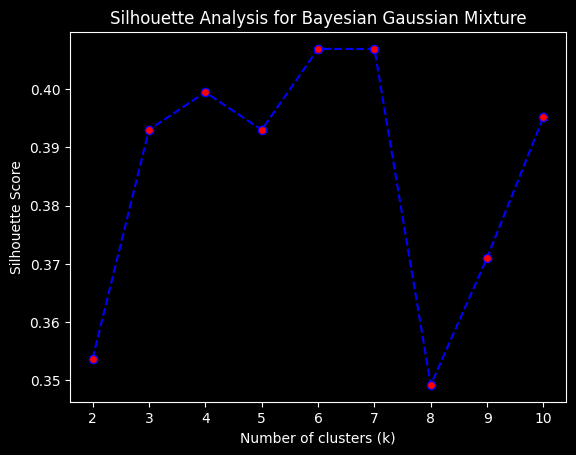

In [4]:
plt.plot(
    range(2, 11),
    silhouette,
    linestyle="dashed",
    color="blue",
    marker="o",
    markerfacecolor="red",
)
plt.xticks(np.arange(2, 11))
plt.xlabel("Number of clusters (k)")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Analysis for Bayesian Gaussian Mixture")
plt.show()

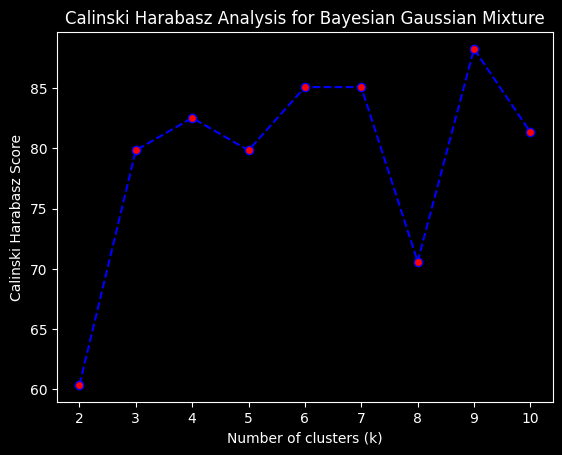

In [5]:
plt.plot(
    range(2, 11),
    calinski_harabasz,
    linestyle="dashed",
    color="blue",
    marker="o",
    markerfacecolor="red",
)
plt.xticks(np.arange(2, 11))
plt.xlabel("Number of clusters (k)")
plt.ylabel("Calinski Harabasz Score")
plt.title("Calinski Harabasz Analysis for Bayesian Gaussian Mixture")
plt.show()

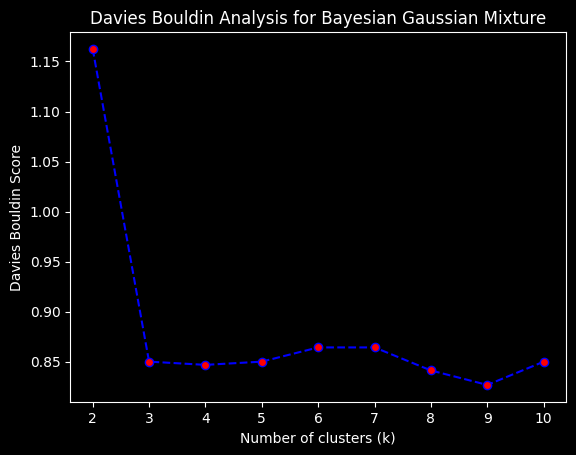

In [6]:
plt.plot(
    range(2, 11),
    davies_bouldin,
    linestyle="dashed",
    color="blue",
    marker="o",
    markerfacecolor="red",
)
plt.xticks(np.arange(2, 11))
plt.xlabel("Number of clusters (k)")
plt.ylabel("Davies Bouldin Score")
plt.title("Davies Bouldin Analysis for Bayesian Gaussian Mixture")
plt.show()

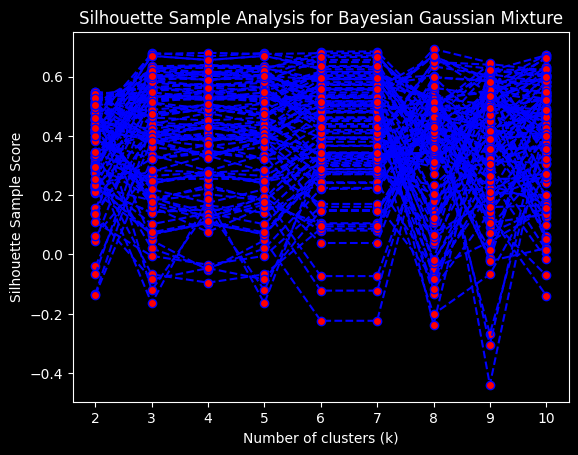

In [7]:
plt.plot(
    range(2, 11),
    silhouette_s,
    linestyle="dashed",
    color="blue",
    marker="o",
    markerfacecolor="red",
)
plt.xticks(np.arange(2, 11))
plt.xlabel("Number of clusters (k)")
plt.ylabel("Silhouette Sample Score")
plt.title("Silhouette Sample Analysis for Bayesian Gaussian Mixture")
plt.show()

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/mixture/_base.py:275: ConvergenceWarning: Best performing initialization did not converge. Try different init parameters, or increase max_iter, tol, or check for degenerate data.
  warnings.warn(


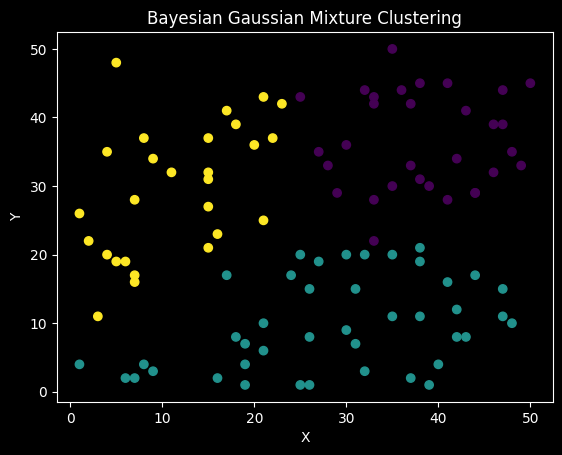

In [8]:
bgm = BayesianGaussianMixture(n_components=4)
cluster_labels = bgm.fit_predict(df)
plt.scatter(df["X"], df["Y"], c=cluster_labels)
plt.xlabel("X")
plt.ylabel("Y")
plt.title("Bayesian Gaussian Mixture Clustering")
plt.show()

In [9]:
print("Silhouette Score :", silhouette_score(df, cluster_labels))
print("Calinski Harabasz Score :", calinski_harabasz_score(df, cluster_labels))
print("Davies Bouldin Score :", davies_bouldin_score(df, cluster_labels))
print("Silhouette Samples :", silhouette_samples(df, cluster_labels))

Silhouette Score : 0.3994882356534163
Calinski Harabasz Score : 82.5173161195355
Davies Bouldin Score : 0.8469173211952615
Silhouette Samples : [ 0.54712513  0.27034382  0.54169383  0.22350332  0.26984699  0.15219748
  0.60717291  0.60444549  0.23366768 -0.04599107  0.49049444  0.47513567
  0.61020487  0.14227452  0.3971614   0.63878187  0.55400891  0.57665265
  0.66814619  0.43238482  0.52485188  0.63734476  0.38157141  0.55223828
  0.42869903  0.15255095  0.68022516  0.57651434  0.47742769  0.54824868
  0.62927159  0.35086625  0.6100252   0.58866842  0.49060334  0.39076436
  0.52136964  0.56796659  0.20310242  0.52214585 -0.0519473   0.4236052
  0.11713826  0.44770516  0.44745085  0.5887948   0.53225232  0.12373553
  0.10361604  0.45193971  0.56811739  0.28174889  0.1068661   0.53298876
  0.40961457  0.63889085  0.45209661  0.34167085 -0.03440484  0.61292239
  0.25560442  0.36513211 -0.09484414  0.56257453  0.5052654   0.49032532
  0.52392734  0.39261057  0.60551335  0.27906603  0.27

In [10]:
dump(bgm, "../../../Models/bayesianGaussianMixture.joblib")

['../../../Models/bayesianGaussianMixture.joblib']